In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('Data_Test.xlsx')
data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


# 1. Car Model & Its Frequency

In [3]:
# car model frequencies
car_freq = data['Name'].value_counts()
car_freq_df = pd.DataFrame(car_freq).reset_index()
car_freq_df = car_freq_df.rename(columns = {'index':'Car_Type','Name':'Frequency'})
car_freq_df.head()

,Car_Type,Frequency
0,Maruti Alto LXi,9
1,Honda City 1.5 V MT,8
2,Maruti Swift Dzire VDI,8
3,Volkswagen Polo 1.2 MPI Highline,8
4,Hyundai i10 Sportz 1.2,7


In [4]:
from matplotlib import pyplot as plt
plt.bar(car_freq_df['Car_Type'].head(),car_freq_df['Frequency'].head())
plt.xlabel('Car_Type')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.title('Car Model And Frequencies')
plt.show()

<Figure size 640x480 with 1 Axes>

# 2.Location wise cars avilability to sell

In [5]:
location_cars = data['Location'].value_counts()
location_cars_df = pd.DataFrame(location_cars).reset_index()
location_cars_df = location_cars_df.rename(columns = {'index':'Location','Location':'No_Of_Cars'})
location_cars_df

,Location,No_Of_Cars
0,Mumbai,159
1,Pune,143
2,Coimbatore,136
3,Hyderabad,134
4,Kochi,121
5,Kolkata,119
6,Delhi,106
7,Chennai,97
8,Jaipur,86
9,Bangalore,82


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

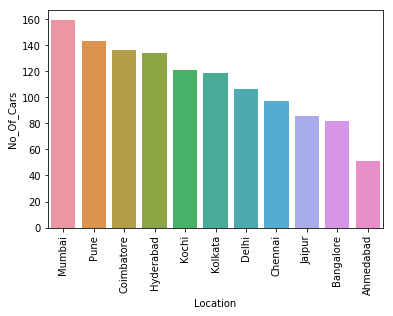

In [6]:
import seaborn as sns
sns.barplot(location_cars_df['Location'],location_cars_df['No_Of_Cars'])
plt.xticks(rotation = 90)

# 3. Year wise no of models

In [7]:
year_car = data.groupby(['Year']).size().reset_index()
year_car = year_car.rename(columns = {0:'No_Of_Cars'})
year_car.sort_values(by = 'No_Of_Cars', ascending = False)
year_car.nlargest(5,columns = ['No_Of_Cars'])

,Year,No_Of_Cars
15,2015,185
16,2016,145
13,2013,142
14,2014,128
17,2017,122


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

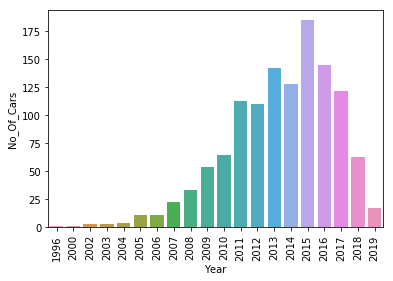

In [8]:
sns.barplot(year_car['Year'],year_car['No_Of_Cars'])
plt.xticks(rotation = 90)

# 4. Fuel_Type

In [9]:
fuel_type = data.groupby(['Fuel_Type']).size().reset_index()
fuel_type.rename(columns = {0:'No_Of_Cars'},inplace = True)
fuel_type.sort_values(by = 'No_Of_Cars', ascending = False)
fuel_type

,Fuel_Type,No_Of_Cars
0,CNG,6
1,Diesel,647
2,LPG,2
3,Petrol,579


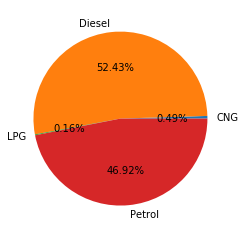

In [10]:
plt.pie(fuel_type['No_Of_Cars'],labels = fuel_type['Fuel_Type'],autopct = '%.2f%%')
plt.show()

In [11]:
transmission_type = data.groupby(['Transmission']).size().reset_index().rename(columns = {0:'Count'})
transmission_type.sort_values(by = 'Count',ascending = False)

,Transmission,Count
1,Manual,905
0,Automatic,329


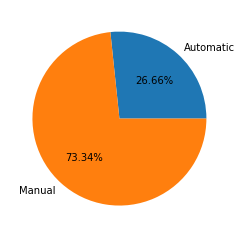

In [12]:
plt.pie(transmission_type['Count'],labels = transmission_type['Transmission'],autopct = '%.2f%%')
plt.show()

# 5.Mileage

In [13]:
milage = data['Mileage'].str.split().str.get(0).astype('float')
milage1 = pd.DataFrame(milage)
milage1.head()

,Mileage
0,32.26
1,24.70
2,13.68
3,23.59
4,18.50


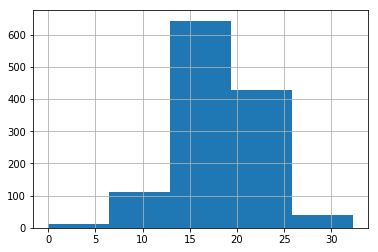

In [14]:
plt.hist(milage1['Mileage'],bins = 5)
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


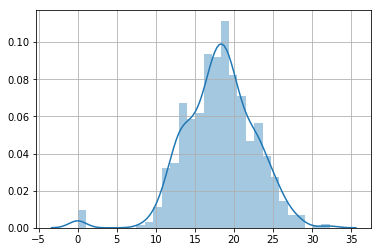

In [15]:
sns.distplot(milage1);
plt.grid(True)
plt.show()

# 6.Engine Capacity

In [16]:
engine = data['Engine'].dropna().str.split().str.get(0).astype('int')
engine_df = pd.DataFrame(engine)
engine_df.sort_values(by = 'Engine', ascending = False).head()

,Engine
335,5998
1038,4395
823,3696
167,3498
451,2999


In [17]:
import warnings
warnings.filterwarnings('ignore')

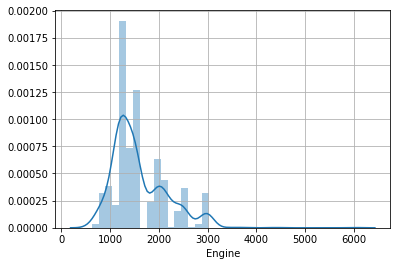

In [18]:
sns.distplot(engine_df['Engine'])
plt.grid(True)
plt.show()

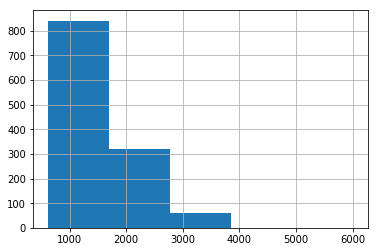

In [19]:
plt.hist(engine_df['Engine'],bins = 5)
plt.grid(True)
plt.show()

# 7.Power

In [20]:
power = data['Power'].str.replace('null bhp','').str.split().str.get(0).dropna().astype(float)
power1 = pd.DataFrame(power)
power1.sort_values(by = 'Power',ascending = False).head()

,Power
335,616.00
1038,450.00
167,364.90
941,362.07
1098,360.00


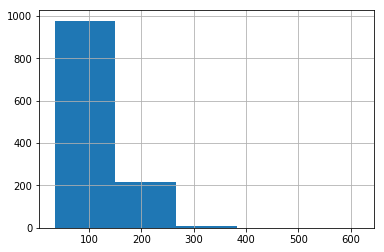

In [21]:
plt.hist(power1['Power'],bins = 5)
plt.grid(True)
plt.show()

# 8. seat frequency

In [22]:
seat = data['Seats'].value_counts().reset_index().rename(columns = {'index':'Seat_Capacity','Seats':'Count'})
seat

,Seat_Capacity,Count
0,5.0,1033
1,7.0,122
2,8.0,36
3,4.0,20
4,6.0,7
5,10.0,3
6,2.0,2


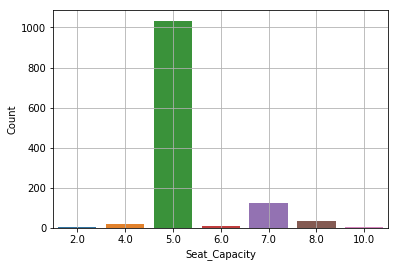

In [23]:
sns.barplot(seat['Seat_Capacity'],seat['Count'])
plt.grid(True)
plt.show()

# 9. Location,year,fuel_type,transimission wise vehicles

In [24]:
mask1 = data[['Name','Location','Year','Fuel_Type','Transmission']]
mask2 = mask1.groupby(['Name','Location','Year','Fuel_Type','Transmission']).size().reset_index()
mask2.head()

,Name,Location,Year,Fuel_Type,Transmission,0
0,Audi A3 35 TDI Attraction,Ahmedabad,2014,Diesel,Automatic,1
1,Audi A3 35 TDI Premium Plus,Hyderabad,2015,Diesel,Automatic,1
2,Audi A4 2.0 TDI,Bangalore,2013,Diesel,Automatic,1
3,Audi A4 2.0 TDI,Bangalore,2014,Diesel,Automatic,2
4,Audi A4 2.0 TDI,Delhi,2012,Diesel,Automatic,1


# 10. Less than 25000 kilometers_driven vehicles

In [25]:
mask1 = data['Kilometers_Driven']<25000
mask2 = data['Fuel_Type'] == 'Diesel'
lessthan_25k_driven_diesel_vehicles = data[mask1 & mask2]
lessthan_25k_driven_diesel_vehicles.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
47,Mercedes-Benz A Class A200 CDI Sport,Chennai,2015,21000,Diesel,Automatic,First,20.0 kmpl,2143 CC,136 bhp,5.0,NaN
67,Volkswagen Ameo 1.5 TDI Comfortline,Mumbai,2018,4708,Diesel,Manual,First,21.66 kmpl,1498 CC,108.62 bhp,5.0,9.4 Lakh
112,Mercedes-Benz New C-Class C 250 CDI Avantgarde,Delhi,2016,22000,Diesel,Automatic,First,19.71 kmpl,2143 CC,201.15 bhp,5.0,NaN
136,Jaguar XE 2.0L Diesel Prestige,Pune,2018,24001,Diesel,Automatic,First,13.6 kmpl,1999 CC,177 bhp,5.0,52.96 Lakh
193,BMW 7 Series 730Ld DPE Signature,Chennai,2017,16000,Diesel,Automatic,First,16.77 kmpl,2993 CC,261.49 bhp,5.0,1.58 Cr
